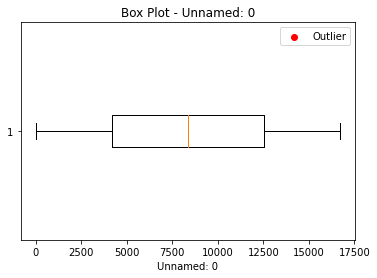

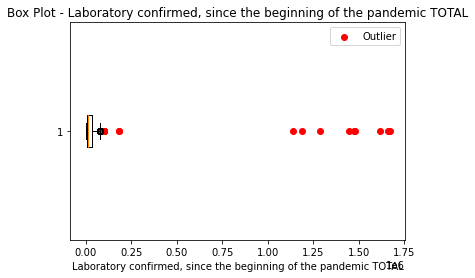

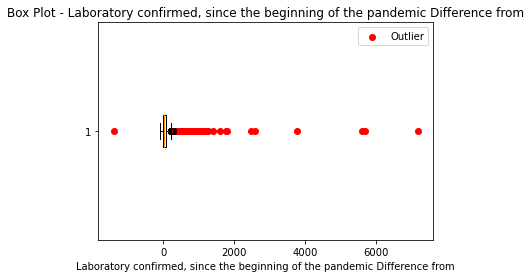

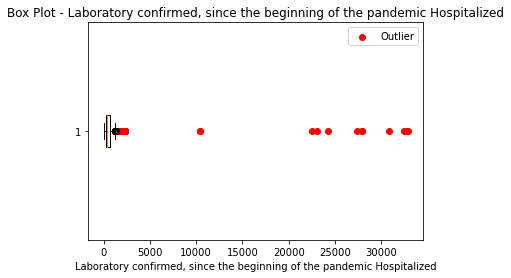

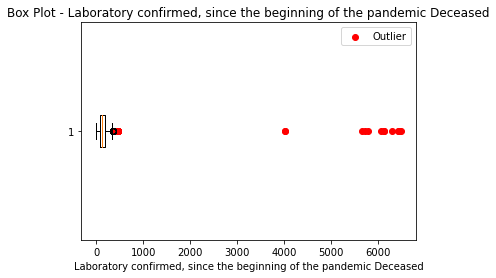

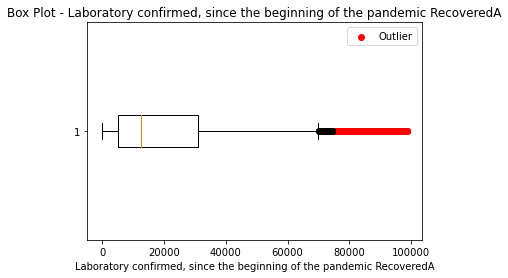

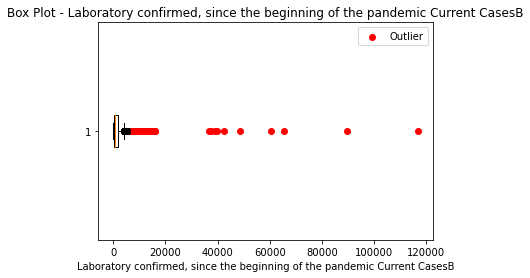

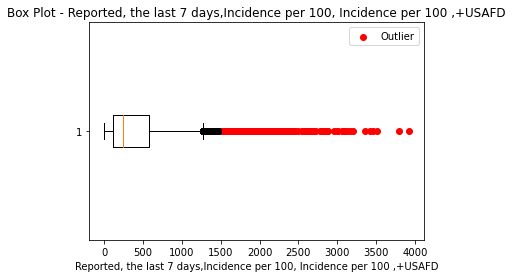

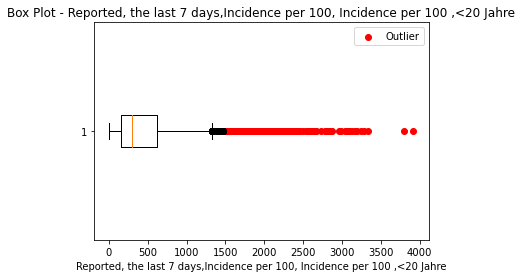

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Excel file first
df = pd.read_excel(r'C:\Users\ASUS\Downloads\merged_data2.xlsx')

# Selecting all the columns of interest (Specifically numeric columns)
numeric_columns = df.select_dtypes(include='number').columns

# Iteratinf over each and every numeric column
for column in numeric_columns:
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculating the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculation of Tukey's fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Identifying all the potential outliers
    outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    non_outliers = df[(df[column] >= lower_fence) & (df[column] <= upper_fence)]

    # Generating a box plot with mainly potential outliers highlighted
    plt.figure()
    plt.title(f"Box Plot - {column}")
    plt.boxplot(non_outliers[column], vert=False)
    plt.scatter(outliers[column], [1] * len(outliers), color='red', label='Outlier')
    plt.xlabel(column)
    plt.legend()
    plt.show()
